# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Srishti Tiwari </font>

# Introduction

This assignment intends us to get familiar with Linear Regression. Linear Regression is the most common used Supervised Learning algorithm. It helps in making easy predictions and can be used to predict the value of target variables given one or more features. **

For this assignment we need to implement Least Mean Square and Least Squares and then use these models to predict values in the dataset. To accomplish this, we are given two python classes LinearRegress and LMS. 
To test these algorithms, I took Bike Sharing dataset containing weather information since it has linearly varying attributes, which makes perfect case for linear models. I divided my dataset into train and test datasets and then performed LS and LMS on training dataset. I tested the prediction on the test dataset and calculated the root mean square error.

# Data

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data.


- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

Dataset Characteristics

    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	



In [458]:
from IPython.display import display
import numpy as np
#Visualization
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline


In [459]:
data = pd.read_csv('hour.csv')
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [461]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [462]:
data.drop('instant',axis=1,inplace=True)

In [463]:
data['mnth'].replace({1 : "January",2 : "February",3 : "March",4 : "April", 5 : "May", 6 : "June", 7 : "July",8 : "August",9 : "September",10 : "October",11 : "November",12 : "December"}, inplace=True)


In [464]:
data['season'].replace({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'}, inplace=True)

Text(0.5, 1.0, 'Number of bikes rented per season')

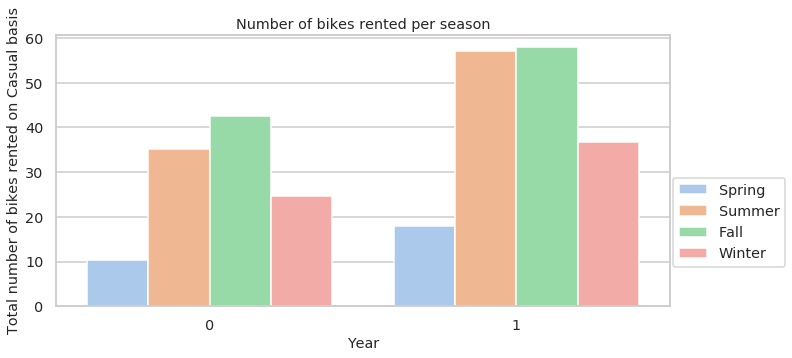

In [465]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=data,palette='pastel', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

This graph tells us about the total number of bikes rented on a casual basis per season in different years. 
We can see that the count of users changes on the basis on season/weather outside.
Most number of bikes are rented during summer and fall. 

In [466]:
### Analysing the outliers

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

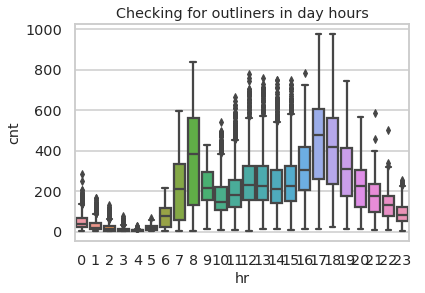

<Figure size 792x360 with 0 Axes>

In [467]:
fig,ax = plt.subplots()
plt.figure(figsize=(11,5))
sns.boxplot(data=data[['cnt','hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours")

This box plot tells us that count data has lot of outliers. We can see that the concentration of usage of bikes is at peak between 7-9 am and 4-7pm in the evening.

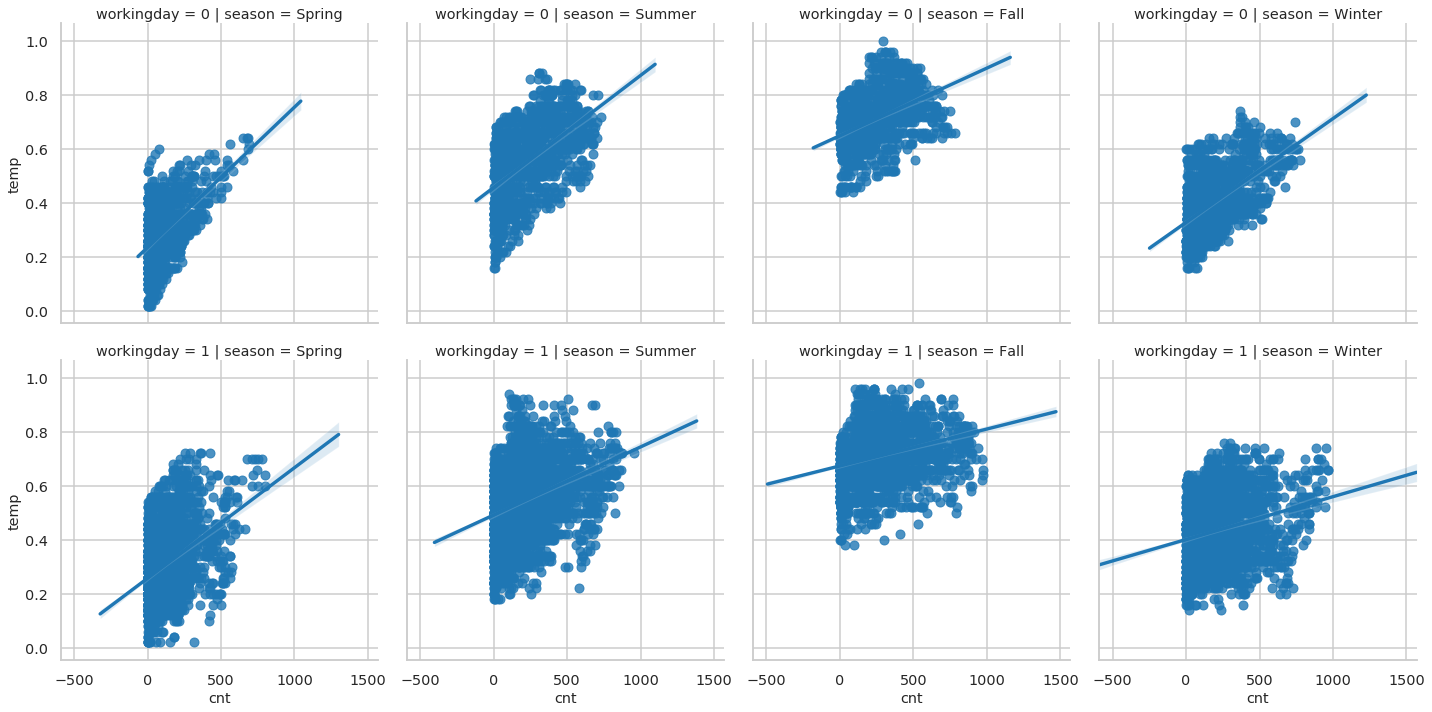

In [468]:
sns.lmplot('cnt','temp',row='workingday',col='season',data=data)

This graph signifies that people prefer to do more cycling on days with higher temperature.

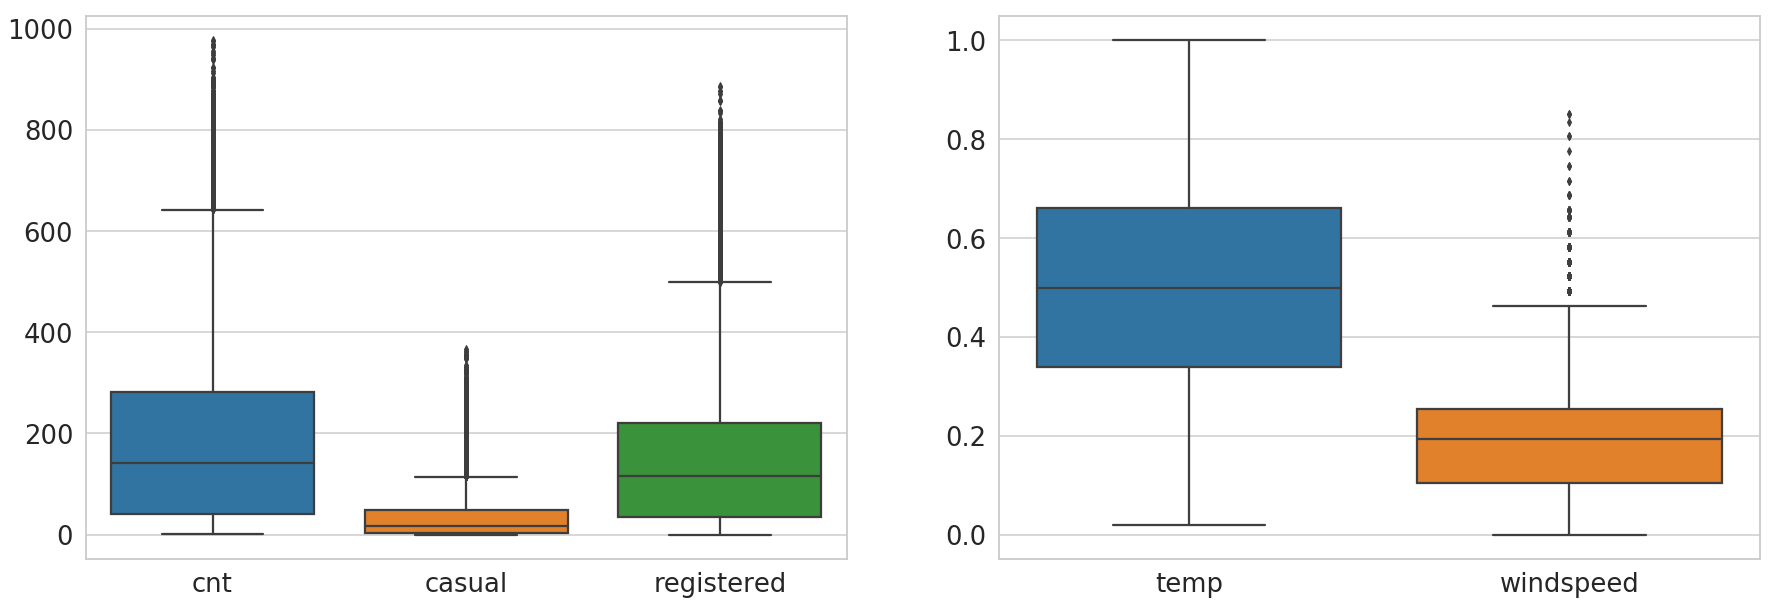

In [469]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=data[['cnt',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=data[['temp',
                          'windspeed']],ax=ax2)

From the first boxplot we can understand that registered users are the regular users. Therefore registered users will have more impact on data than casual users.
From the second box plot we can see that users prefer moderate temperature for biking. There is no data for very low and very high temperatures. We can also say that users prefer less windy days for biking. 

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

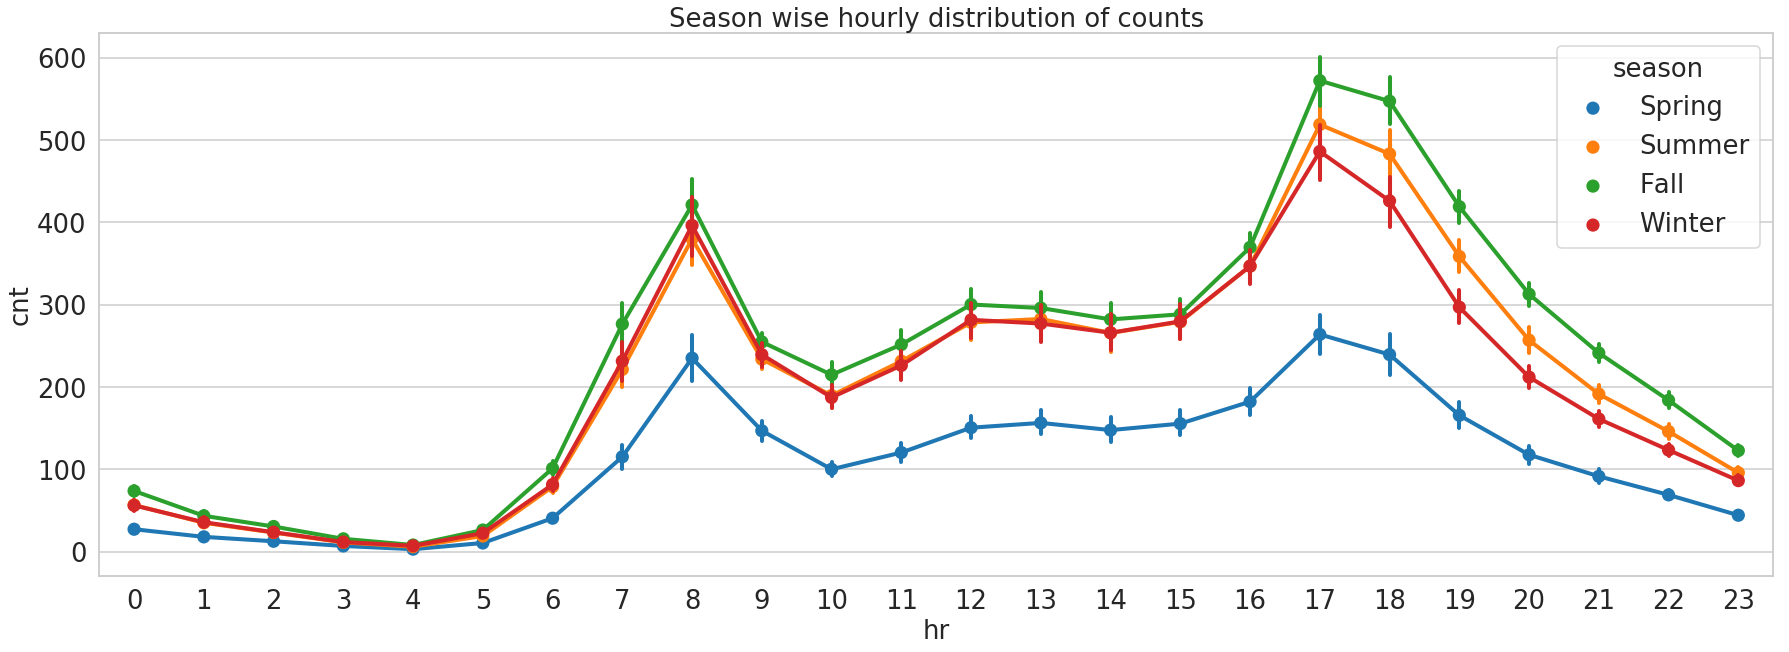

In [470]:
fig,ax = plt.subplots()
sns.pointplot(data=data[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

Here we observe clearly that users are least likely to hire bikes in spring and most likely to hire bikes in fall, followed by summer and fall. 
We observe two peaks, one in the morning between 7-9 am and one in the evening between 4-7 pm. This means people use the bike mostly for everyday commute according to regular office hours.

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

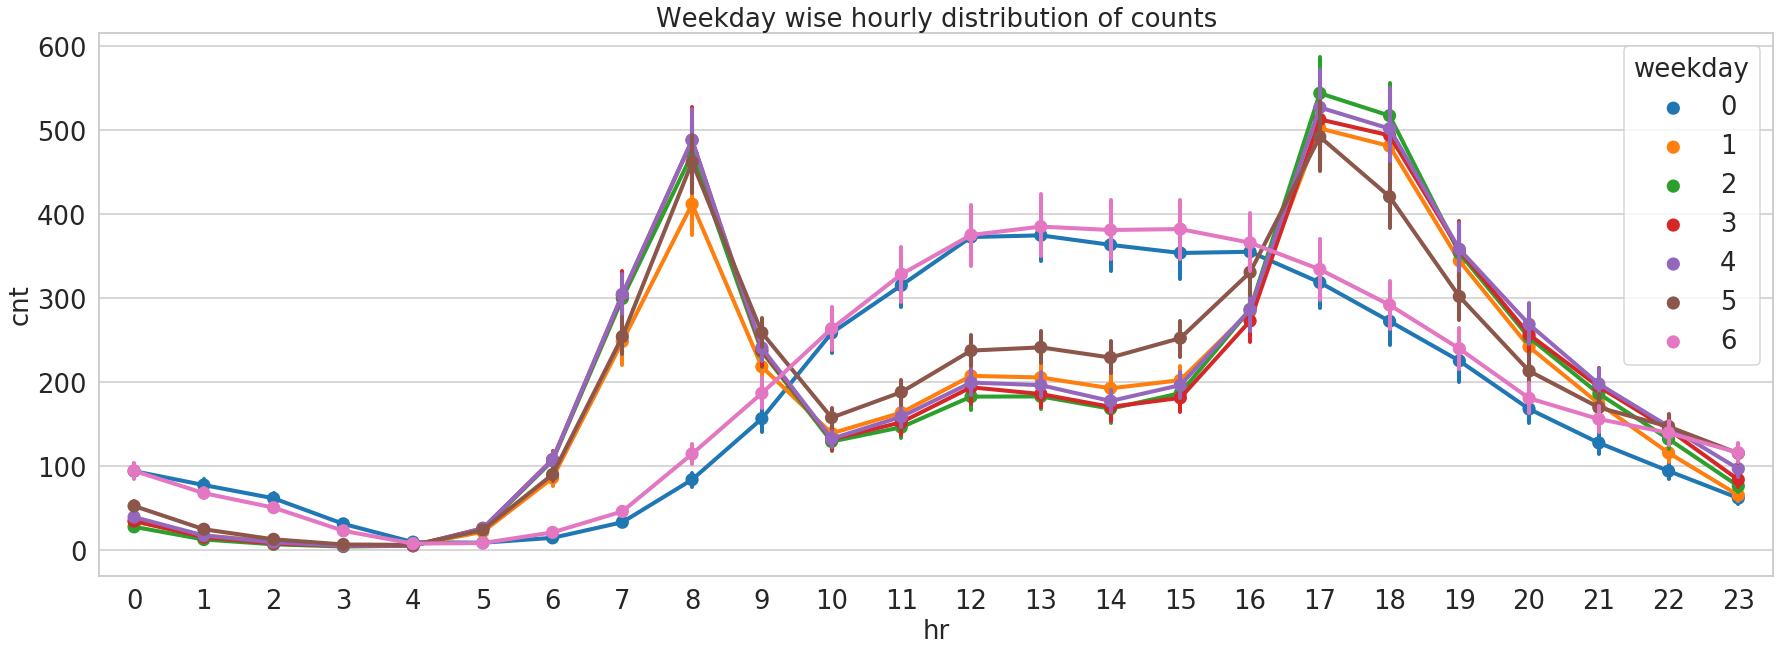

In [471]:
fig,ax = plt.subplots()
sns.pointplot(data=data[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

Here we observe the hourly distribution of number of users day-wise. We can see that during the weekdays, the bikes are in high demand during morning and evening, and comparitively less during the rest of the day.
Whereas on weekdends, the demand is quite constant and distributed throughout the day, because the users are using the bikes for leisure.

# Method

### Linear Model
Linear model can be defined as a Euclidean dot product between two vectors:

$$
\begin{align}
  f(x; w) &amp;= w^\top x = \sum_0^D w_i x_i \\
     &amp;= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$
where $w$ is a weight vector and $x$ is an input vector. When it is a one dimensional vector, it represents a straight line, so it is called linear.

Assume that we have $N$ data observations, $x_i$ and target outputs, $t_i$, for $i = 1, \cdots, N$. The simpliest model that we can think of is constant model, $f(x) = c$, where $c$ is any scalar. In this case, we have the zero weights in the linear model.

The linearity in the parameter $x$ make the optimization based on deravatives to solvable analytically. The model limits the complexity so its representation is also limited. However, it can prevent possible overfitting with the simple modeling, especially when you have sparsely sampled data.

### Least Squares
The parameter that gives best fit will be

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$
Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to $w$ to zero. For this, let us prepare data in matrix. The target values are collected in matrix $T$, and the input samples are in matrix $X$.

The error function is quadratic. Therefore, to get we can get the parameters giving minimum by taking the derivating of the function and setting it to 0. This derivation gives us following relation.

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &amp;= 0\\
\\
X^\top X w &amp;= X^\top T\\
\\
w &amp;= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$
### Least Mean Square¶

The Least Square model uses entire dataset at one for training the model and finding the best weights. Even though it does well but it is often computationally costly, especially when we have large number of features and a very large training dataset.

In case of large dataset, sequential or online learning is preferred. In this method, the records of the dataset are fed to the training function one-by-one, which in turn update weights. Using the updated parameters, it makes a new estimation and repeat these steps.

Initially the weight vector w is assigned with random values and it is updated as follows until convergence. When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$
where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. This method is also called stochastic gradient descent or sequential gradient descent.

For the $k$'th sample $x_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &amp;= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
        &amp;= 2 \Big( f(x_k; w^{(k)}) - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( f(x_k; w^{(k)}) - t_k \Big) \\
        &amp;= 2 \Big( {w^{(k)}}^\top x_k - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( {w^{(k)}}^\top x_k - t_k \Big) \\
        &amp;= 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$


### Super Classs Definition

In [472]:

import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
   
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

### Least Squares

In [473]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
                
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.lstsq(X.T @ X, X.T @ T)[0] 
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w

#### Implementation

Implementation of this model is done in the LinearRegress class. 

1. **train**: It takes a feature matrix and reference values of the training set and apply the above relation to generate weights. 
The weights are stored in array "w". 

2. **use**: This method can be used to execute the trained model on the test dataset. 
It returns an array of projected results by performing dot product of weight vector (w) with features (X) of test dataset.



### Least Mean Squares

In [474]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.insert(x, 0, 1).reshape(-1, 1)
        if self.w is None:
            self.w = np.zeros((x.shape[0], 1))
        temp = self.w.T @ x - t
        temp1 = self.alpha * temp * x
        self.w = np.subtract(self.w, temp1)
        
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        t = self.w.T @ X.T
        return t.T
        

#### Implementation

Implementation of Least Mean Square model:  In the LMS class two methods are defined, "train", "train_step" and "use".
1. **train_step**: Trainstep method takes a sample one by one from the training dataset and adjusts the weight vector
2. **train**: The train method calls trainstep method, for each record in the training set
3. **use**: Use method is same as in the "LinearRegress" class

### Usage Examples

In [475]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

/home/srishti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


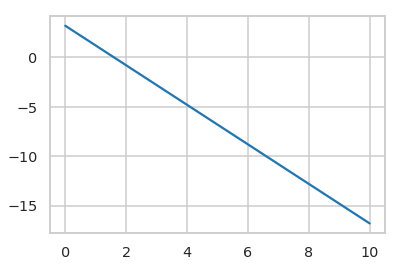

In [476]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

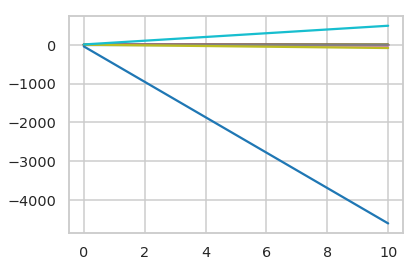

In [477]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

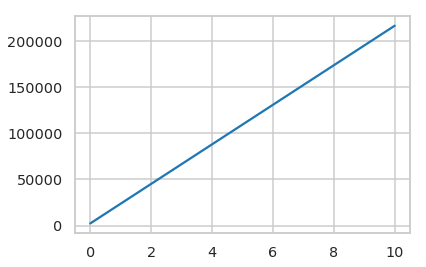

In [478]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

### Bike rentals affected by weather

I am performing the experiment on weather attributes such as temperature(actual temperature and "feels like" temperature), humidity, spped of the wind and how the weather is(clear, cloudy, raining, mist) versus the number of bikes people rent according to the weather condition.

For experiment purpose I have taken 75% of my data to be training data and the remaining 25% of my data is test data. The models are trained using the training data and are tested on test data to predict the output. Also, as a simple quantitative measure, I have reported RMSE(root mean square error result) that compares with the actual target value scale and tells how big or small is the error.

In [479]:
# Dividing the dataset into Training and Test data
data = pd.read_csv('hour.csv')
train = data.sample(frac = .75)
test = data.sample(frac = .25)

/home/srishti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


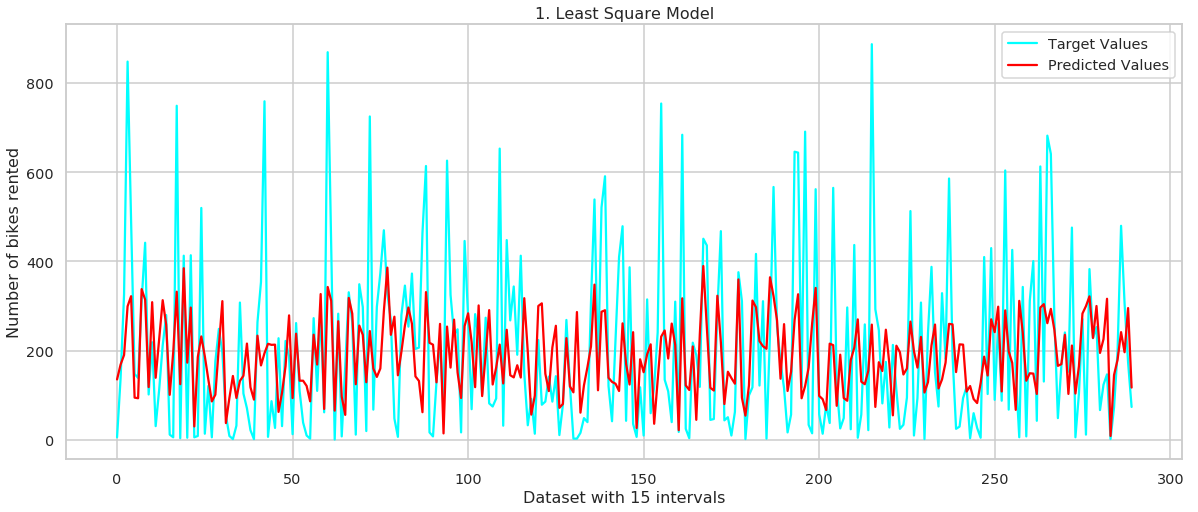

Root mean square error is: 14.273928255194383


In [480]:
# Training with Least Square Model
import math
import matplotlib.pyplot as plt1
%matplotlib inline

ls = LinearRegress()
ls.train(train[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values, train['cnt'].values.reshape(-1, 1))
T = ls.use(test[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values)

plt.figure(figsize=(20,8))
plt.title('1. Least Square Model', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='cyan')
plt.plot(T[0::15], label='Predicted Values', color = 'red')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()


rmse = np.sqrt(((test['cnt'].values - T) ** 2).mean())

print('Root mean square error is: ' + str(math.sqrt(rmse)))

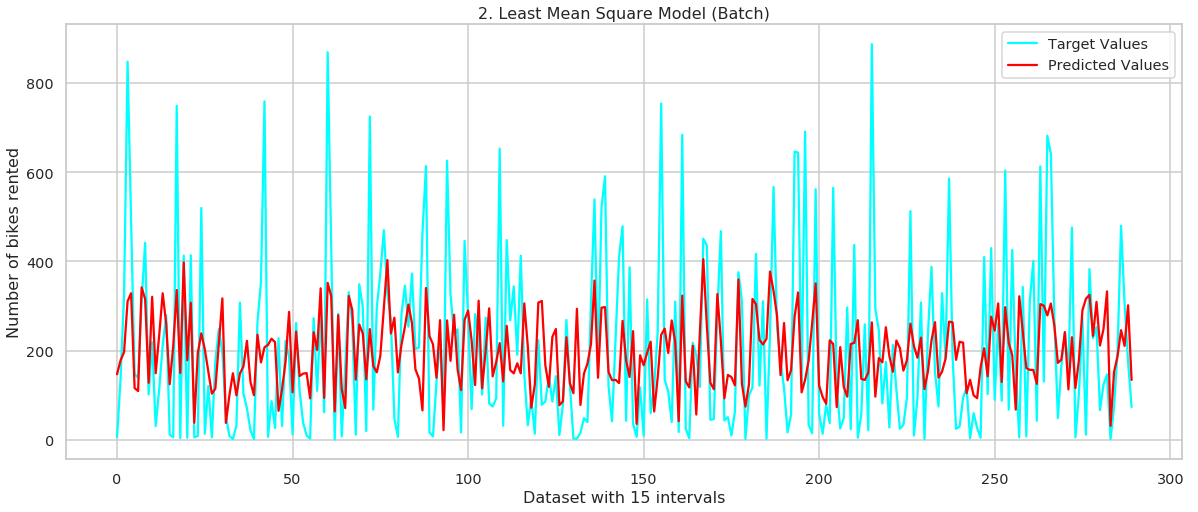

Root mean square error is: 14.240549935083072


In [481]:
# Training with Least Mean Square Model(Batch)
lms = LMS(0.01)
lms.train(train[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values, train['cnt'].values.reshape(-1, 1))

T = lms.use(test[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values)
plt.figure(figsize=(20,8))
plt.title('2. Least Mean Square Model (Batch)', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='cyan')
plt.plot(T[0::15], label='Predicted Values', color = 'red')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()


rmse = np.sqrt(((test['cnt'].values - T) ** 2).mean())
print('Root mean square error is: ' + str(math.sqrt(rmse)))

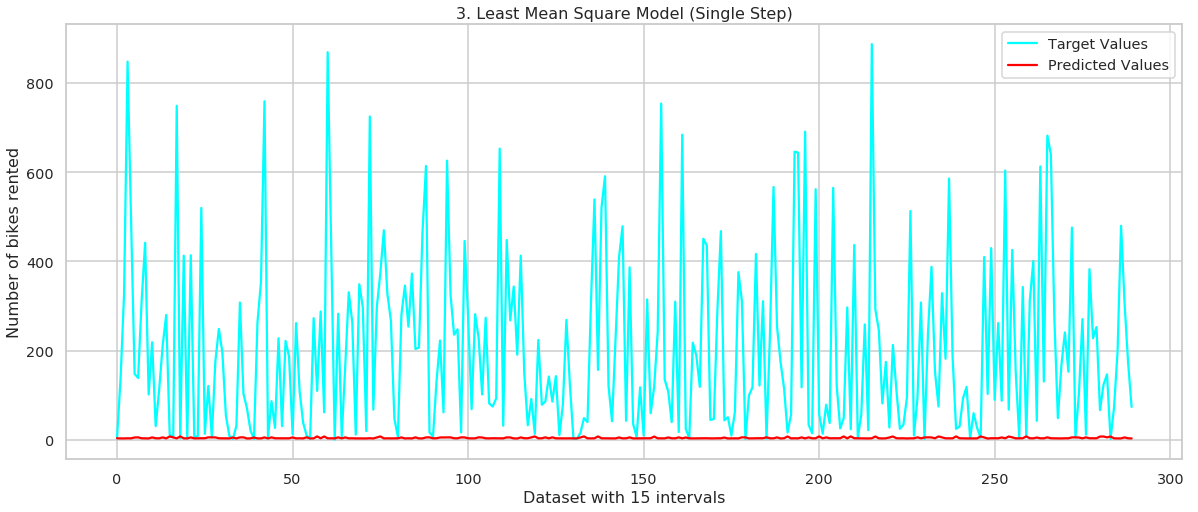

Root mean square error is: 16.194879038603315


In [482]:
# Training with Least Mean Square Model(Single Step)
lms = LMS(0.01)
lms.train_step(train[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values[0], train['cnt'].values.reshape(-1, 1)[0])

T = lms.use(test[['temp', 'atemp','hum', 'windspeed', 'weathersit']].values)
plt.figure(figsize=(20,8))
plt.title('3. Least Mean Square Model (Single Step)', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='cyan')
plt.plot(T[0::15], label='Predicted Values', color = 'red')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()

rmse = np.sqrt(((T- test['cnt'].values) ** 2).mean())
print('Root mean square error is: ' + str(math.sqrt(rmse)))

### Analysis of algorithms
When we compare the above plots, we can say that the Least Square model is the most accurate model as the target value and the predicted value overlap each other the most. Least Mean Square Model(Single Step) has the highest root mean square error because it only gives the mean results and since the model is trained with very less training set the weights do not align properly. Hence, we can say that weather situations does have an impact on the number of bikes rented.



# Conclusions

1. This assignment helped me understand Least Square and Least Mean Square algorithms and its implementation
2. This assignment also makes it clear why pre-processing of data is significantly important to get desired and expected output.
3. It also helped me understand why it is necessary to convert given datetypes into appropriate datatype before plotting.

# References

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://python-graph-gallery.com/seaborn/
3. http://www.scipy-lectures.org/intro/matplotlib/index.html
4. https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
5. https://www.kaggle.com/marklvl/bike-sharing-dataset/
6. https://github.com/

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

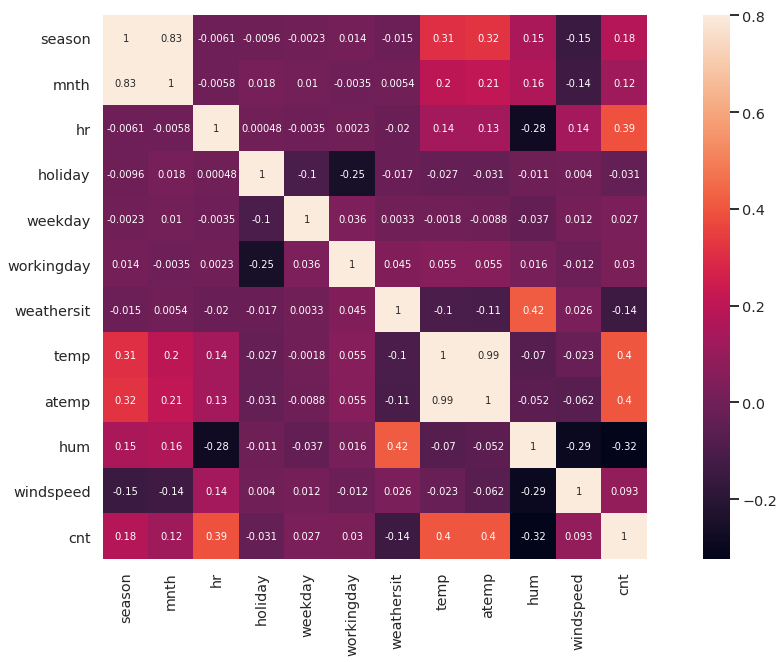

In [483]:
corrmatr = data[["season", "mnth", "hr", "holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","cnt"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmatr,vmax=.8, square=True,annot=True)

Plotting correlation matrix between count and other features to see how these features influence the dependent variable count.

* Temperature(What it is and how it feels) has a highest positive correlation with count, followed by hour
* Feature such as humidity has the highest negative impact on the dependent variable count followed by overall weather situation
* Working day, holiday and weekday do not have significant impact on our dependent variable. Why these features don't have much impact on number of bikes rented can be seen from the plot. Most of the customers are registered customers and they may rent the bike if it is a working day/weekday to go office/school and on holidays these people may rent the bike for leisure. 

* Hence we can say that the most important features in Bike Sharing System are temp, atemp, hum, hr and windspeed whereas workingday, holiday or weekday are not so important features.


To prove the above hypothesis, we are plotting two Least Square graphs one with most important features and in other least important features and comparing them to our Least Square Model results. Least square model has given the most accurate results by far, that is why we are using the same to compare the two feature sets, to arrive at most accurate conclusion.

/home/srishti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


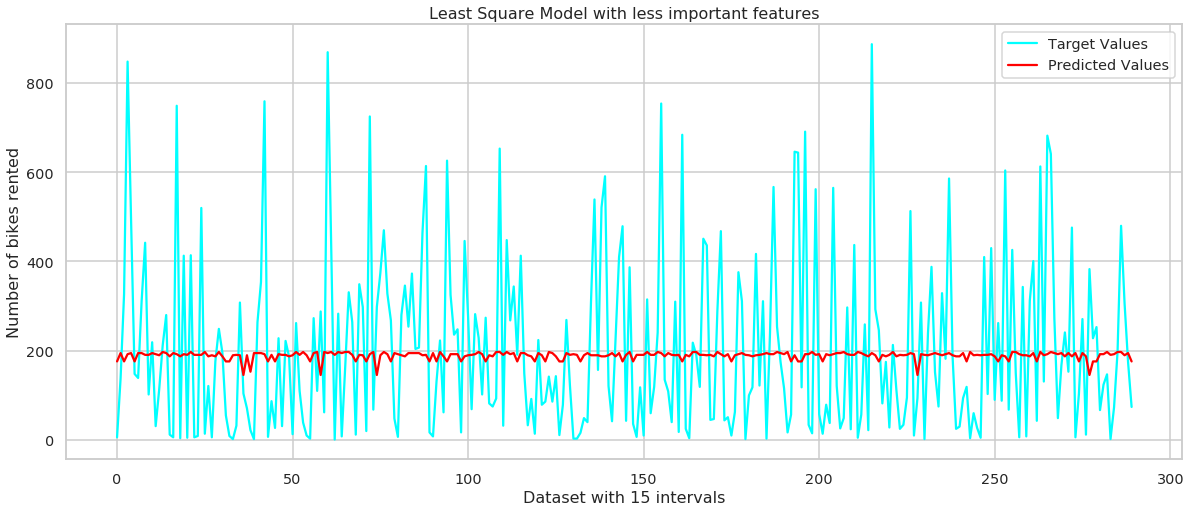

In [484]:
ls = LinearRegress()
ls.train(train[["holiday","weekday","workingday"]].values, train['cnt'].values.reshape(-1, 1))
T = ls.use(test[["holiday","weekday","workingday"]].values)

plt.figure(figsize=(20,8))
plt.title('Least Square Model with less important features', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='cyan')
plt.plot(T[0::15], label='Predicted Values', color = 'red')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()

/home/srishti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


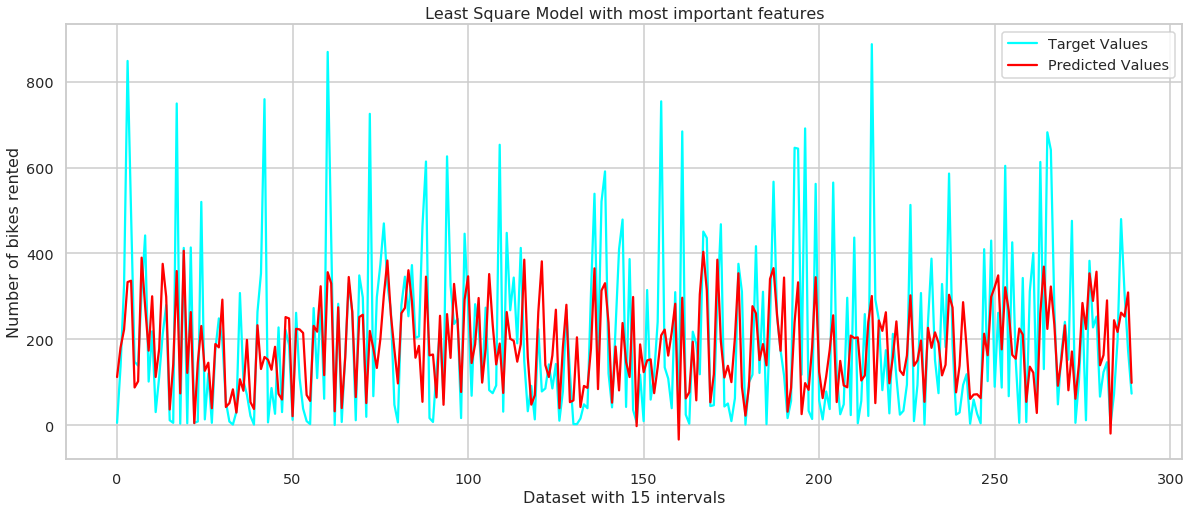

In [485]:
ls = LinearRegress()
ls.train(train[["hr","temp","atemp","hum","windspeed"]].values, train['cnt'].values.reshape(-1, 1))
T = ls.use(test[["hr","temp","atemp","hum", "windspeed"]].values)

plt.figure(figsize=(20,8))
plt.title('Least Square Model with most important features', fontsize=16)
plt.plot(test['cnt'].values[0::15], label='Target Values', color='cyan')
plt.plot(T[0::15], label='Predicted Values', color = 'red')
plt.xlabel('Dataset with 15 intervals', fontsize=16)
plt.ylabel('Number of bikes rented', fontsize=16)
plt.legend()
plt.show()

## Conclusion

Looking at the above graphs we can say that if we remove the most significant features the there is a huge difference in the predicted values and the target values. Therefore, it is important to have relevant/important features in a dataset to predict the outcome correctly. 
Therefore, our hypothesis about least significant and most significant features was correct.



# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [486]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


/home/srishti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
